# Ejemplo de manipulación de archivos de video

## 1. Operaciones básicas con video

### <span style="color:RoyalBlue">Reproducción de un archivo de video</span> 

Es posible insertar un video dentro de una Notebook de Jupyter de la siguiente manera:

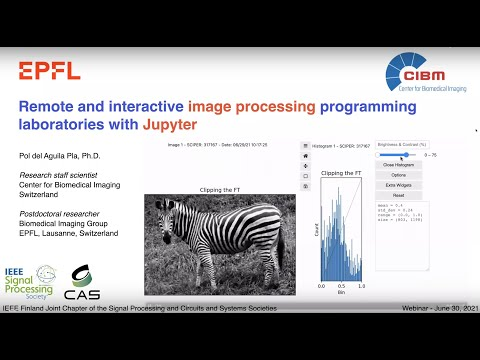

In [1]:
# Link: https://www.youtube.com/watch?v=AF18wN37B6Q
# Title: Image Processing Labs with Jupyter

from IPython.display import YouTubeVideo
YouTubeVideo('AF18wN37B6Q', width=800, height=450)

### <span style="color:RoyalBlue">Procesamiento de video con OpenCV</span> 

OpenCV (Open Source Computer Vision Library) es una biblioteca para el procesamiento de imágenes y visión por computadora. Es un software libre y proporciona una infraestructura básica para aplicaciones de visión artificial.

Para instalar la biblioteca se puede hacer:
pip install opencv-python

### Cargar imagen desde archivo
En este ejemplo en primer lugar cargamos la biblioteca

In [1]:
import cv2 

Cargamos una imagen utilizando 'imread' especificando la ruta de acceso:

In [2]:
input = cv2.imread('./images/input.jpg')

El archivo ahora está cargado y almacenado en Python como la variable 'input'. Veamos la forma que tiene esa variable:

In [3]:
print(input.shape)

(830, 1245, 3)


Vemos que tien 830 * 1245 píxeles (alto x ancho) y 3 canales de color (RGB).

Para mostrar la variable de imagen se puede usar el método imshow de OpenCV. El primer parámetro es el título mostrado en la ventana de la imagen y el segundo la variable que contiene la imagen

In [4]:
cv2.imshow('Museo Louvre - Paris', input)
cv2.waitKey(5000)

cv2.destroyAllWindows()

El método waitKey permite introducir información cuando se abre una ventana de imagen. Si se lo deja en blanco, el programa espera a que se pulse cualquier tecla antes de continuar. Colocando números (excepto el 0), se puede especificar un retardo para el tiempo que mantiene la ventana abierta (en milisegundos).

El comando destroyAllWindows cierra todas las ventanas abiertas. Si no se coloca esto, el programa se va a colgar.

### Guardar imagen a un archivo
Para almacenar en archivo una image, podemos hacer lo siguiente:

In [5]:
cv2.imwrite('./images/output.jpg', input)

# Cambiemos uno de los canales de color:
image2 = input.copy()
image2[:,:,2]=0
cv2.imwrite('./images/output.png', image2)

True

### Captura de video y detección de rostro
En el siguiente ejemplo vamos a capturar video desde una cámara y hacer la detección del rostro en tiempo real:

In [7]:
# Lectura de un stream de video desde la cámara frame a frame
import cv2

cap = cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
while True:
    ret,frame = cap.read()
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    if ret == False:
        continue
    faces=face_cascade.detectMultiScale(gray_frame,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow("Video Frame",frame)
    

    #Opera hasta que el usuario apriete la tecla q (quit)
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()